<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/a5_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
##reading data
db1=pd.read_csv("50_Startups.csv")
db1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
##renaming data as there are spaces and big names of data
db2=db1.rename({'R&D Spend':'RDS','Administration':'ADMIN','Marketing Spend':'MKTS'},axis=1)
db2

,RDS,ADMIN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
db2[db2.duplicated()] # No duplicated data

,RDS,ADMIN,MKTS,State,Profit


In [ ]:
db2.describe()

,RDS,ADMIN,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
##Correlation
db2.corr()

<ipython-input-116-699ed900313a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db2.corr()


,RDS,ADMIN,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


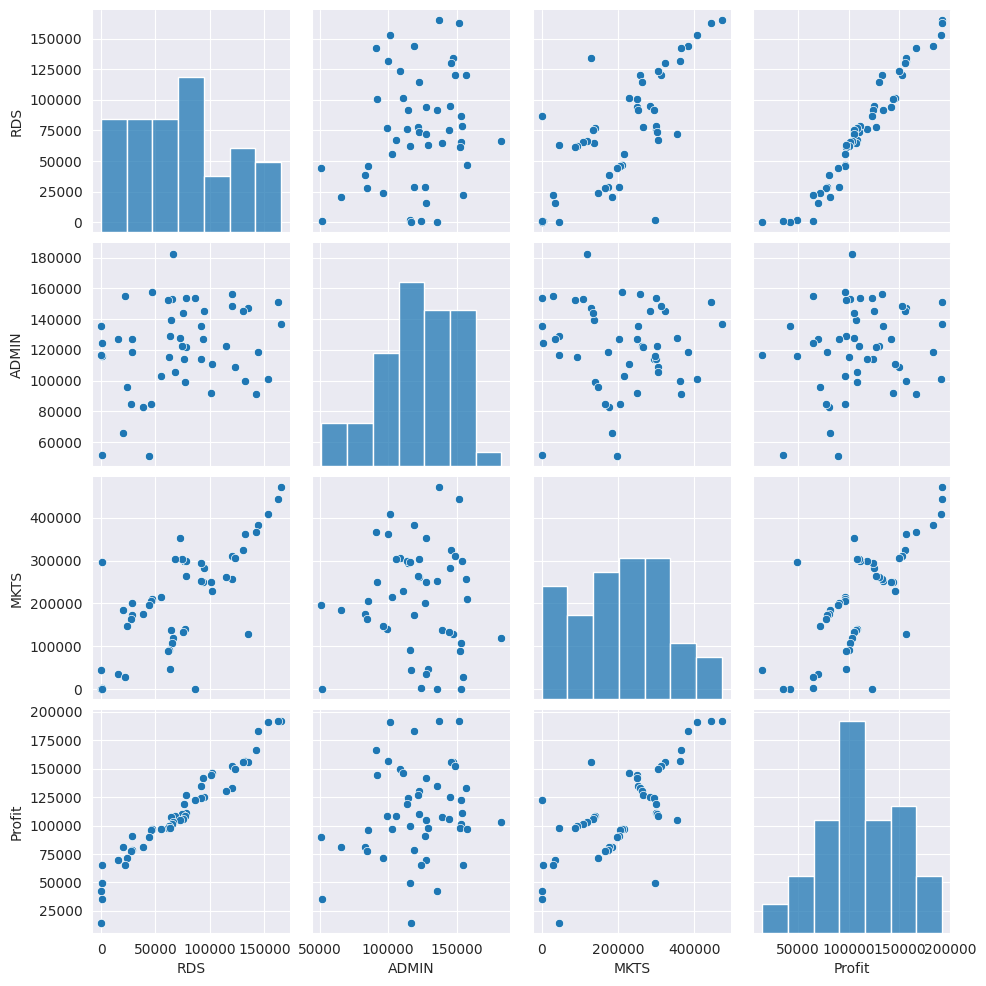

In [ ]:
##scatter plot between variables and histogram
sns.set_style(style='darkgrid')
sns.pairplot(db2)

In [ ]:
##BUILD MODEL
import statsmodels.formula.api as smf
model = smf.ols('Profit~RDS+ADMIN+MKTS',data=db2).fit()

In [ ]:
##COEFFICIANTS
model.params

Intercept    50122.192990
RDS              0.805715
ADMIN           -0.026816
MKTS             0.027228
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMIN        -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMIN        0.60176
 MKTS         0.10472
 dtype: float64)

In [ ]:
# Finding rsquared values
model.rsquared , model.rsquared_adj
# Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [ ]:
##SLR regrassion model checking individul values for all insignificant data
ml_AD=smf.ols('Profit~ADMIN',data=db2).fit()
print(ml_AD.tvalues,'\n', ml_AD.pvalues)

Intercept    3.040044
ADMIN        1.419493
dtype: float64 
 Intercept    0.003824
ADMIN        0.162217
dtype: float64


In [ ]:
ml_MK=smf.ols('Profit~MKTS',data=db2).fit()
print(ml_MK.tvalues,'\n', ml_MK.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [ ]:
ml_AM=smf.ols('Profit~+ADMIN+MKTS',data=db2).fit()
print(ml_AM.tvalues,'\n', ml_AM.pvalues)

Intercept    1.142741
ADMIN        2.467779
MKTS         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADMIN        1.729198e-02
MKTS         9.727245e-11
dtype: float64


In [ ]:
###MODEL VALIDATION
## Calculate VIF = 1/(1-Rsquare) for all independent variables check co linearity problem
rsq_ad=smf.ols('ADMIN~RDS+MKTS',data=db2).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_mk=smf.ols('MKTS~RDS+ADMIN',data=db2).fit().rsquared
vif_mk=1/(1-rsq_mk)

rsq_r=smf.ols("RDS~ADMIN+MKTS",data=db2).fit().rsquared
vif_r=1/(1-rsq_r)

## sorting vif values in dataframe
d1={'Variables':['RDS','ADMS','MKTS'],'VIF':[vif_r,vif_ad,vif_mk]}
VIF_FRAME=pd.DataFrame(d1)
VIF_FRAME

##Insignificant value ADMIN AND MKTS IN this MKTS VIF VALUE IS HIGH

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


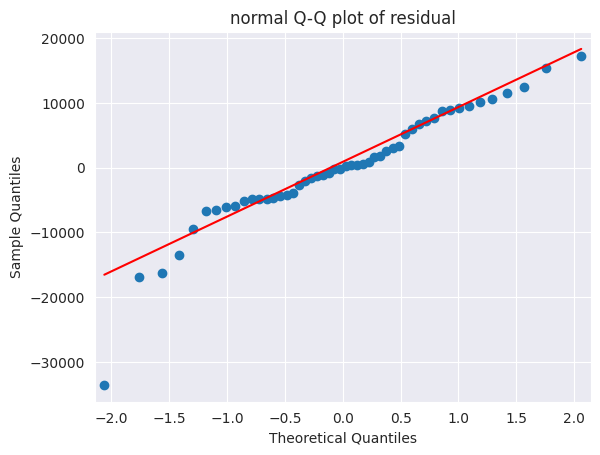

In [ ]:
#RESIDUAL ANALYSIS TEST FOR NORMALITY OF RESIDUAL USINF Q-Q PLOT this will help us finding outliers so the we can remove those and get good model
import statsmodels.api as sm
qq_plot = sm.qqplot(model.resid,line='q')##line=45 to draw digonal line
plt.title("normal Q-Q plot of residual")
plt.show()


In [ ]:
##Residual plot for homoscedasticity in this we can see there is no pattern but all values are liying around 0
def standard_values(vals) : return (vals-vals.mean())/vals.std()

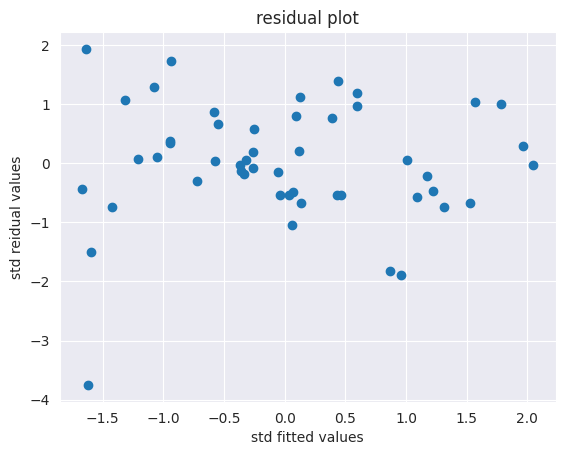

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('residual plot')
plt.xlabel('std fitted values')
plt.ylabel('std reidual values')
plt.show()

##no pattern no problem

eval_env: 1


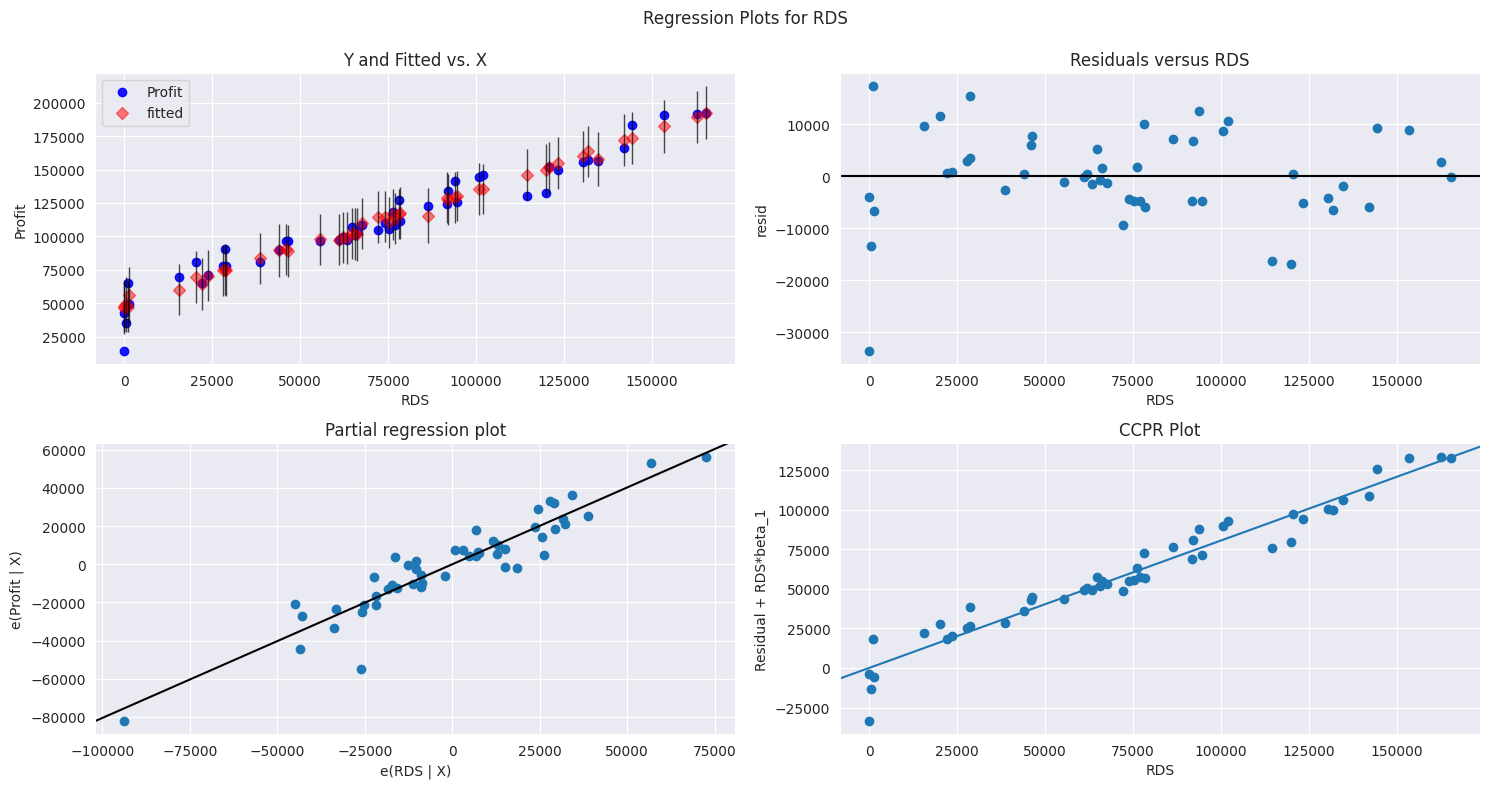

In [ ]:
##Residual vs regressors
##we can sww no specific pattern although it is +ve ly lineared
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

eval_env: 1


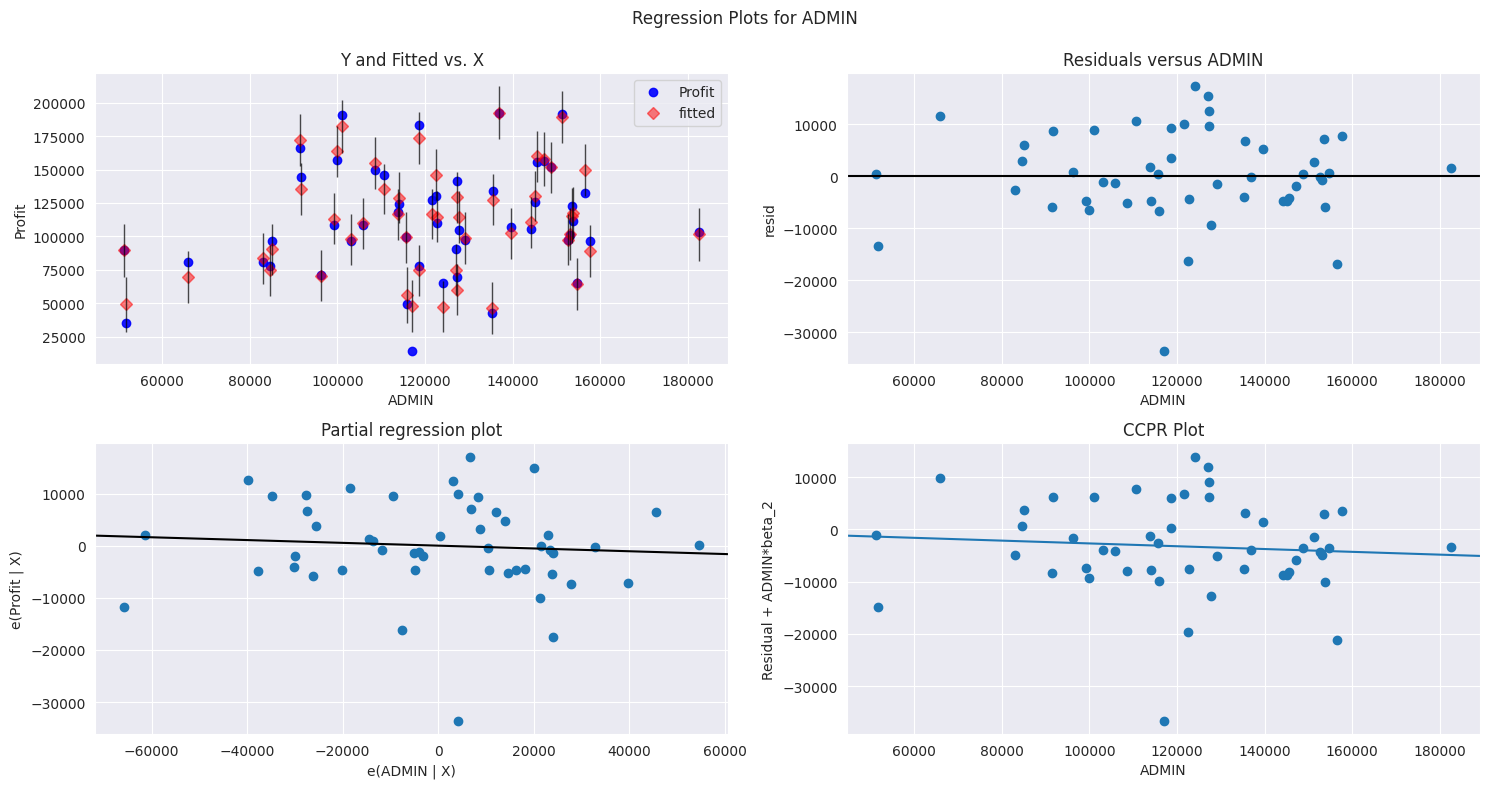

In [ ]:
##no pattern but all data is near 0 and a bit -ve lineared
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"ADMIN",fig=fig)
plt.show()

eval_env: 1


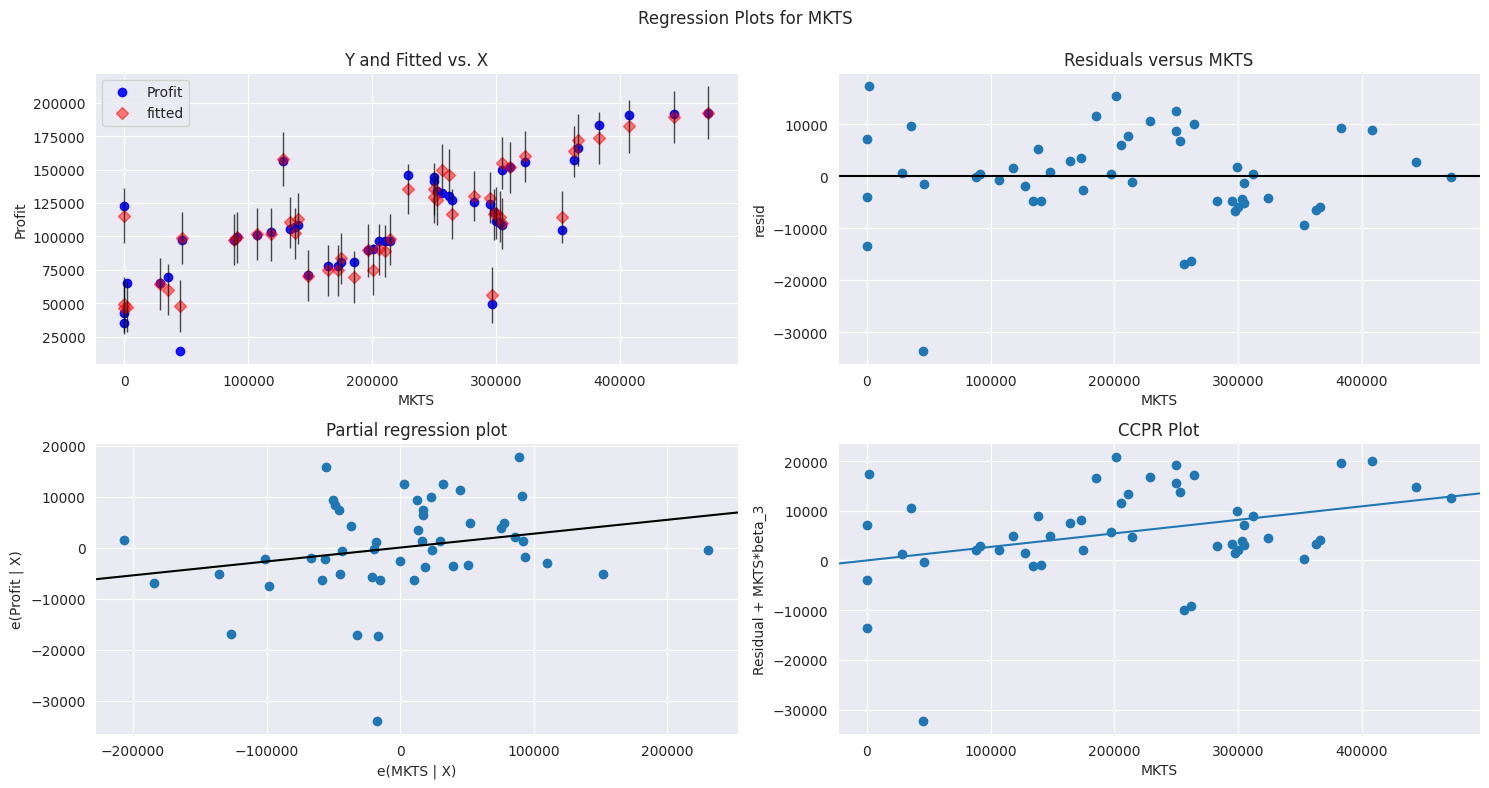

In [ ]:
##no pattern but vaibales are more scttered
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MKTS",fig=fig)
plt.show()

In [ ]:
##Model Deletion Diagnostics (checking Outliers or Influencers)
#1. Cook's Distance & 2. Leverage value

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

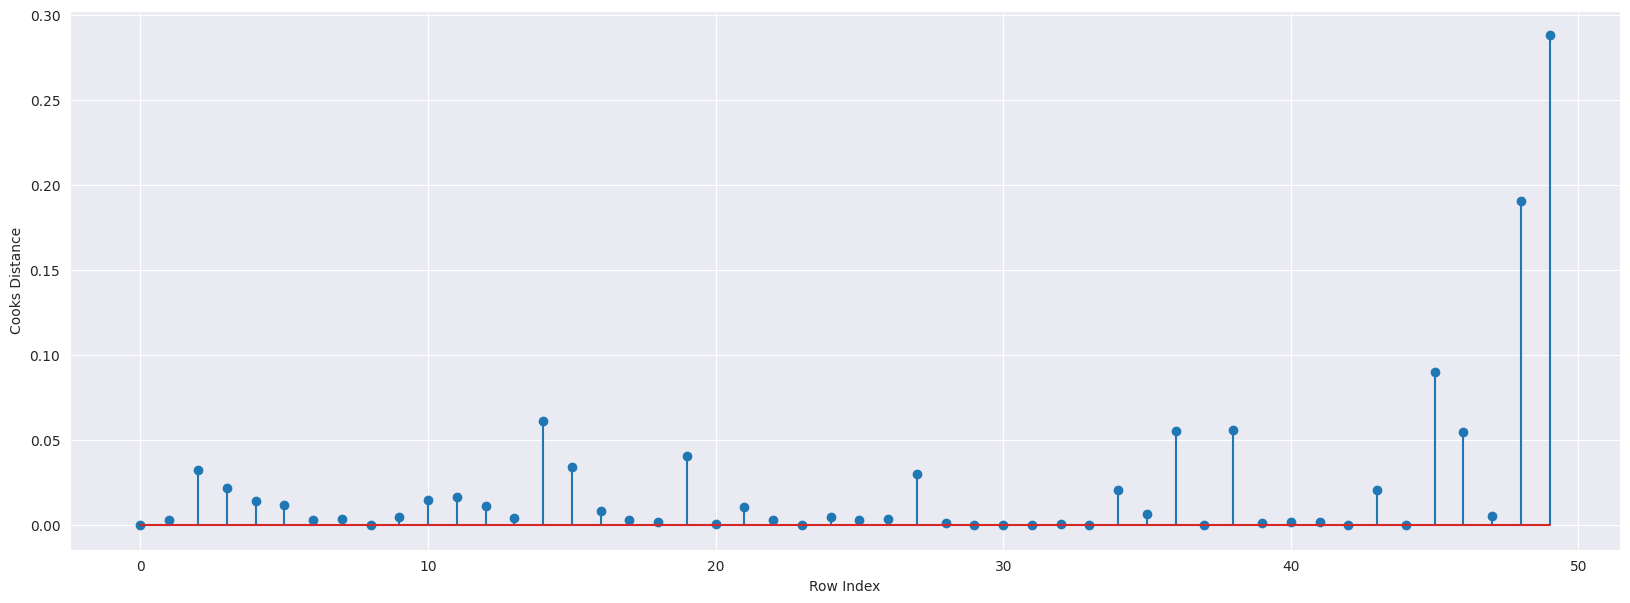

In [ ]:
#plot influences values using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(db2)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [ ]:
##index value of influnced where value is >1 as we can see there is one value more than 1 that is 49
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

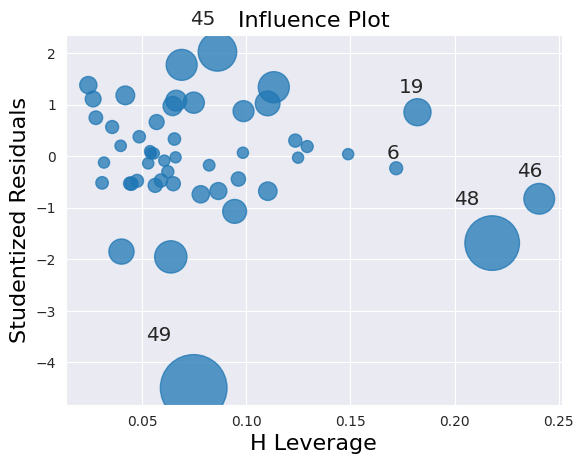

In [ ]:
##  Leverage value for high influesed data

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [ ]:
k=db2.shape[1]
n=db2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

##leverage cutoff is 36

0.36

In [ ]:
db2[db2.index.isin([49])]

##as comparing values with data db2 49 have 0.0 value then maind db2 model its a huge diff

,RDS,ADMIN,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
db2[db2.index.isin([47])]

,RDS,ADMIN,MKTS,State,Profit
47,0.0,135426.92,0.0,California,42559.73


In [ ]:
db2.head()

,RDS,ADMIN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
##Improve model##discard outliers

db2_new=pd.read_csv("50_Startups.csv")

In [ ]:
##Discard influencrs here we removed outlier 49 and 47
db3=db2_new.drop(db2_new.index[49],axis=0).reset_index()
##Drop original index
db3=db3.drop(['index'],axis=1)
db3

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
db3=db2_new.drop(db2_new.index[47],axis=0).reset_index()
##Drop original index
db3=db3.drop(['index'],axis=1)
db3

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
db3=db3.rename({'R&D Spend':'RDS','Administration':'ADMIN','Marketing Spend':'MKTS'},axis=1)
db3

,RDS,ADMIN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
##Final model exclude vif mkts and generate r^2 and aic bic model

final_ml=smf.ols('Profit~ADMIN+RDS',data=db3).fit()

(final_ml.rsquared,final_ml.aic,final_ml.bic)

(0.9447635995211611, 1039.2354411227393, 1044.9109020170713)

In [ ]:
##as we can see both have high r^2 and low aic but vif is less for admin
inal_ml=smf.ols('Profit~MKTS+RDS',data=db3).fit()

(final_ml.rsquared,final_ml.aic,final_ml.bic)

(0.9474703775800717, 1036.773440146926, 1042.448901041258)

In [ ]:
final_ml.rsquared

0.9447635995211611

In [ ]:
final_ml_a=smf.ols('Profit~ADMIN+RDS',data=db3).fit()



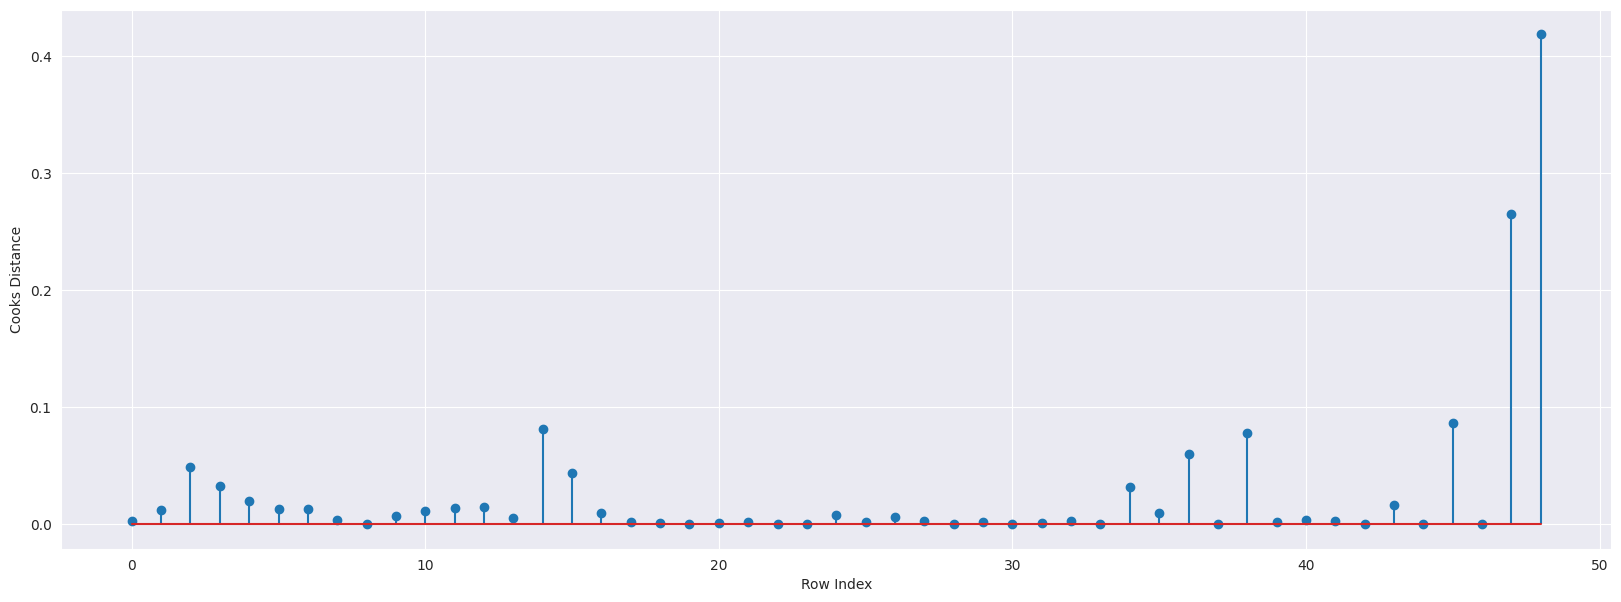

In [ ]:
model_influence_a=final_ml_a.get_influence()
(c,_)=model_influence_a.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(db3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()
###After delection of outliers there is no data >1

In [ ]:
##prediction of data
##new data for prediction
new_data=pd.DataFrame({'RDS':70000,"ADMIN":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMIN,MKTS
0,70000,90000,140000


In [ ]:
final_ml_a.predict(new_data)

0    110473.344708
dtype: float64

In [ ]:
final_ml_a.predict(db3.iloc[0:5,])

0    189933.025314
1    186862.741262
2    181477.380355
3    172840.180340
4    172237.164195
dtype: float64

In [ ]:
pred=final_ml_a.predict(db3)
pred

0     189933.025314
1     186862.741262
2     181477.380355
3     172840.180340
4     172237.164195
5     163051.032615
6     163073.080088
7     159452.891793
8     150930.887369
9     155291.047670
10    136827.811819
11    136686.686170
12    129104.342598
13    127098.321590
14    150032.674052
15    147051.116970
16    115793.352052
17    128912.923196
18    127936.397407
19    121435.107623
20    114664.300532
21    114536.442927
22    112289.253647
23    107584.206699
24    116057.936458
25    103465.569698
26    112385.113749
27    110421.697545
28    102539.188712
29    103610.549995
30    102349.770314
31     99794.498223
32    102895.990458
33     97393.343479
34     86935.309842
35     90148.472980
36     73208.227341
37     90139.050225
38     68975.956290
39     83856.758543
40     73703.687906
41     74626.132326
42     70416.503217
43     61909.188837
44     66284.104581
45     49629.238766
46     50308.836160
47     52791.230245
48     49123.505827
dtype: float64